# Linealización de sistemas no-lineales

## Definiciones

Definimos un sistema SISO no-lineal con el par $(\boldsymbol{f},g)$ de la forma:

$$
\begin{aligned}
\dot{\vec x}(t) &= \boldsymbol{f}(\vec x,u)\\
y(t) &= g(\vec x,u)
\end{aligned}
$$

esto es la generalización de sistemas SISO vistos con anterioridad.

## Punto de equilibrio

El punto de equilibrio para el sistema $(\boldsymbol{f},g)$ es $\vec{x_0}, u_0$ con lo que $\boldsymbol{f}(\vec{x_0},u_0)=0$.

## Linealización en variables de estado (Jacobiano)

Por definición sea el **sistema SISO no-lineal** $(\boldsymbol{f},g)$ y dado $(\vec{x_0},u_0)$ un el **punto de equilibrio** del sistema. La linealización del sistema en $(\vec{x_0},u_0)$ es el **sistema SISO lineal**:


$$
\begin{split}
A & = D\boldsymbol{f}(\vec{x_0},u_0)=\begin{bmatrix}
  \frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
  \vdots &  & \vdots \\
   \frac{\partial f_n}{\partial x_1} & \cdots & \frac{\partial f_n}{\partial x_n} \end{bmatrix}\\
B & = \frac{\partial \boldsymbol{f}}{\partial u} (\vec{x_0},u_0) = \begin{bmatrix}
  \frac{\partial f_1}{\partial u}\\
  \vdots \\
   \frac{\partial f_n}{\partial u}\end{bmatrix}\\
C & = Dg(\vec{x_0},u_0)=\begin{bmatrix}\frac{\partial g}{\partial x_1} & \cdots & \frac{\partial g}{\partial x_n}\end{bmatrix}\\
D & = \frac{\partial g}{\partial u} (\vec{x_0},u_0)\\
\end{split}
$$

Donde todas las derivadas parciales son evaluadas en el punto $(\vec{x_0},u_0)$.

### **Ejemplo #1:** Sistema masa-resorte-amortiguador - **linealización Jacobiano**


En este caso consideraremos que el resorte no cumple con la ley de Hooke ($f_k=kx$), sino que la fuerza del resorte sera de la forma $f_k=kx^3$, 

<img src="masa_resorte_amortiguador.png" alt="isolated" width="600"/>

además consideraremos que $x_1=x$ y $x_2=\dot{x}=\dot{x_1}$, entonces el sistema no-lineal será de la forma:

$$ 
f(\vec x,u) =
\begin{bmatrix}
f_1(x_1,x_2,u)\\
f_2(x_1,x_2,u)
\end{bmatrix} =
\begin{bmatrix}
x_2\\
-\frac{k}{m}{x_1}^3-\frac{b}{m}x_2+\frac{1}{m}u+g
\end{bmatrix}
$$

entonces con $\vec{x_0}=\{x_{10},x_{20}\},u_0$ un **punto de equilibrio** del sistema $x_{10}=\pm \sqrt[3]{\frac{1}{k}u_0+mg}$, el sistema linealizado en dicho punto es:

$$
\begin{matrix}
\begin{split}
A &= D\boldsymbol{f}(\vec{x_0},u_0)=\begin{bmatrix}
  0 & 1 \\
  -\frac{3k}{m} {x_{10}}^2 & -\frac{b}{m} \end{bmatrix}\\
B &= \frac{\partial \boldsymbol{f}}{\partial u} (\vec{x_0},u_0) = \begin{bmatrix}
  0\\
  \frac{1}{m}\end{bmatrix}\\
  \end{split}
\end{matrix}
$$

En el caso que la salida del sistema sea la velocidad de la masa, tendremos que $g(\vec x, u)= \dot{x}= x_2$ por lo que:

$$
y = 
\begin{bmatrix} 0 & 1\end{bmatrix} 
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} ; \quad D=0
$$




#### Simulación

En primer lugar hallaremos el punto de equilibrio donde $\dot{x_2}=\dot{x_1}=x_2=0$ y la entrada $u=0$

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
#uso los mismos parametros que se usaron en resorte_no_lineal.ipynb

b = 1     #[kg/s]
m = 3     #[kg]
k = 2     #[kg/s^2]
g = 9.81  #[m/s^2]

x_10 = np.power(m*g/k,1/3)
x_20 = 0
u_0  = 0
print(r"posición equilibrio, x_10 =", x_10, " [m]")

posición equilibrio, x_10 = 2.450492751091135  [m]


In [2]:
A=[[0,1],[-3*k*x_10**2/m,-b/m]]
B=[[ 0 ],[1/m]]
C=[0,1]
D=0

mra_vel_ss = ctrl.StateSpace(A,B,C,D)
mra_vel_ss

StateSpace(array([[  0.        ,   1.        ],
       [-12.00982945,  -0.33333333]]), array([[0.        ],
       [0.33333333]]), array([[0., 1.]]), array([[0.]]))

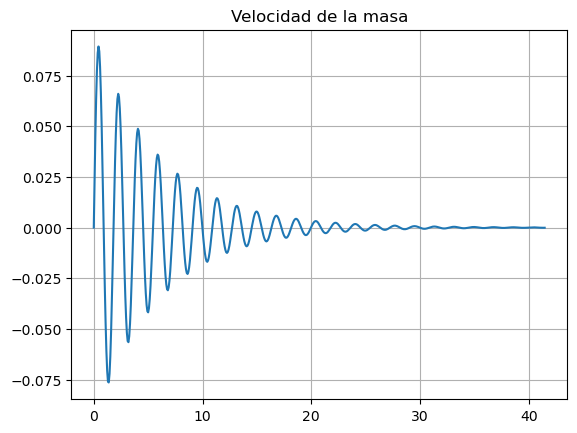

In [3]:
t,y=ctrl.step_response(mra_vel_ss)

plt.figure()
plt.plot(t,y)
plt.title('Velocidad de la masa')
plt.grid()

Ahora consideraremos que la salida del sitema es la posición de la masa $y=x=x_1$ por lo que:

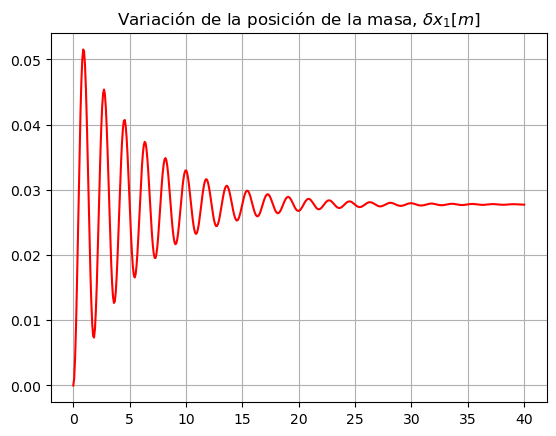

In [4]:
C=[1,0]

mra_pos_ss=ctrl.StateSpace(A,B,C,D)
t=np.linspace(0,40,500)
t,y=ctrl.step_response(mra_pos_ss,T=t)

plt.figure()
plt.plot(t,y,'r')
plt.title(r'Variación de la posición de la masa, $\delta x_1 [m]$')
plt.grid()

## Linealización por expansión polinómica en series de **Taylor**

si tenemos que $y=f(x)$ una función con una única variable $x$ y $(x_0,u_0)$ es un **punto de equilibro** del sistema, entonces la expansión de Taylor de la función $y$ será:

$$
y = f(x_0)+ \frac{df}{dx}\bigg\rvert_{x=x_0} (x-x_0)+\underbrace{ \frac{1}{2\,!}\frac{d^2f}{dx^2}\bigg\rvert_{x=x_0} (x-x_0)^2+ \dots}_{ \text{despreciando los términos no lineales}}
$$


![fig_taylor](lin_taylor_white.png)

Considerando pequeñas variaciones en las proximidades del punto de equilibrio, es decir, $\delta x = x - x_0$ se produciran pequeñas variaciones en la salida, de la forma $\delta y=y-y_0$, donde $y_0=f(x_0)$ tendremos:

$$
\begin{matrix}
y = y_0 + \frac{df}{dx}\bigg\rvert_{x=x_0} (x-x_0) & \Longrightarrow & \delta y = \frac{df}{dx}\bigg\rvert_{x=x_0} \delta x
\end{matrix}
$$

Lo anterior se puede ampliar para el caso de 2 variables de la siguiente manera
$y=f(x_1,x_2)$,  con $(x_{10},x_{20},u_0)$ como un **punto de equilibrio** para el sistema, entonces tendremos que la aproximación por Taylor será:

$$
y \simeq f(x_{10},x_{20})+ \frac{df(x_{1},x_{2})}{dx_{1}}\bigg\rvert_{x=(x_{10},x_{20})} (x_1-x_{10})+\frac{df(x_{1},x_{2})}{dx_{2}}\bigg\rvert_{x=(x_{10},x_{20})} (x_2-x_{20})
$$


### **Ejemplo #2:** Sistema masa-resorte-amortiguador - **Linealización Taylor**

Partiendo de la ecuación del sistema no lineal, haremos una aproximación por Taylor

$$
\ddot x = \frac{1}{m} F+ g - \frac{b}{m} \dot x - \frac{k}{m}x^3\\
y =h (\dot x, x, F)
$$

en el punto de equilibrio:

$$
 \begin{matrix}
 \dot x = \ddot{x}=0 & \Longrightarrow  & (\dot{x_0},x_0, F_0)
 \end{matrix}
$$

entonces
$$
y=y_0+ \frac{dh}{dF}\bigg\rvert_{(\dot{x_0},x_0,F_0)} \delta F+\frac{dh}{d\dot x}\bigg\rvert_{(\dot{x_0},x_0,F_0)} \delta \dot x
$$

$$
\delta y = y-y_0 = \frac{1}{m} \delta F+\left(\frac{-3k{x_0}^2}{m}\right) \delta x +\left(\frac{-b}{m}\right)\delta \dot x
$$

luego, como $\delta y=\delta\ddot{x}$ la ecuación linealizada es

$$
\delta \ddot x = \frac{1}{m} \delta F-\frac{3k{x_0}^2}{m} \delta x-\frac{b}{m} \delta \dot x
$$


### **Ejemplo #3:** Sistema masa-resorte-amortiguador - **cambio de variables**

En este caso vamos a hacer un cambio de variables para obtener el modelo linal perturbativo, de esta forma "siendo prolijos con las cuentas" obtendremos un modelo lineal. Partiremos de:

$$
\begin{matrix}
x(t) = \delta x(t) +x_0 & \text{y} & F(t)= \delta F(t) +F_0
\end{matrix}
$$

donde las variaciones al rededor de $x_0$ deben ser pequeñas, es decir $\delta x \simeq 0$. Nuevamente el punto de equilibrio es 

$$
\begin{matrix}
\ddot x = \frac{1}{m} F+ g - \frac{b}{m} \dot x - \frac{k}{m}x^3\\
y = h(\dot x, x, F)
\end{matrix}
$$

entonces reemplazando tenemos que:

$$
\delta F +F_0 + mg = m \frac{d^2(\delta x +x_0)}{dt^2}+b\frac{d(\delta x +x_0)}{dt} + k (\delta x +x_0)^3
$$

haciendo más cuentas!!!... obtenemos:
$$
\delta F +F_0 + mg = m~ \frac{d^2(\delta x)}{dt^2}+b~\frac{d(\delta x)}{dt} + k~ (\underbrace{{\delta x}^3}_{\simeq 0} +3~\delta x~{x_0}^2+3~x_0~\underbrace{{\delta x}^2}_{\simeq 0}+{x_0}^3)
$$


$$
\delta F = m~ \delta \ddot x)+b~\delta \dot x + 3~k~\delta x~{x_0}^2 +\underbrace{k~{x_0}^3 - F_0 - mg }_{\substack{\simeq 0 \\ \textrm{pto. de equilibrio}}}
$$

y finalmente llegamos al igual que en el ejemplo anterior a la ecuación diferencial linealizada:

$$
\delta \ddot x = \frac{1}{m} \delta F-\frac{3k{x_0}^2}{m} \delta x-\frac{b}{m} \delta \dot x
$$